In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

In [4]:
covid=pd.read_csv("covid_19_data_1.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
print("size/shape of the dataset",covid.shape)
print("checking fot the null values",covid.isnull().sum())
print("checking the date-type",covid.dtypes)

size/shape of the dataset (48095, 8)
checking fot the null values SNo                    0
ObservationDate        0
Province/State     19705
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
checking the date-type SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [6]:
#droping the columns

In [7]:
covid.drop(["SNo"],1,inplace=True)

In [8]:
covid.isnull().sum()

ObservationDate        0
Province/State     19705
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [9]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [10]:
covid["ObservationDate"]

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
48090   2020-06-22
48091   2020-06-22
48092   2020-06-22
48093   2020-06-22
48094   2020-06-22
Name: ObservationDate, Length: 48095, dtype: datetime64[ns]

In [11]:
#grouping different types of cases as per the date

In [12]:
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [13]:
print("basic information")
print("Total number of confirmed cases aroud the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recoverd cases aroud the world",datewise["Recovered"].iloc[-1])
print("Total number of Deaths cases aroud the world",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world",datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])
print("Total number of Close cases around the world",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])

basic information
Total number of confirmed cases aroud the world 9098641.0
Total number of Recoverd cases aroud the world 4526333.0
Total number of Deaths cases aroud the world 472171.0
Total number of Active cases around the world 4100137.0
Total number of Close cases around the world 4998504.0


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152]),
 <a list of 153 Text xticklabel objects>)

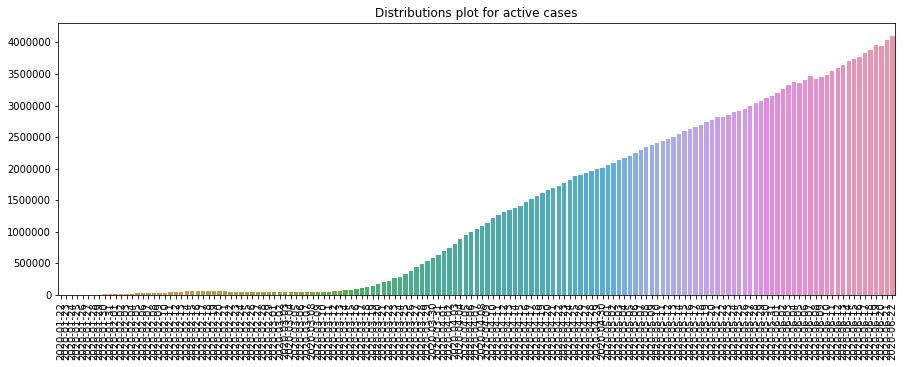

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distributions plot for active cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152]),
 <a list of 153 Text xticklabel objects>)

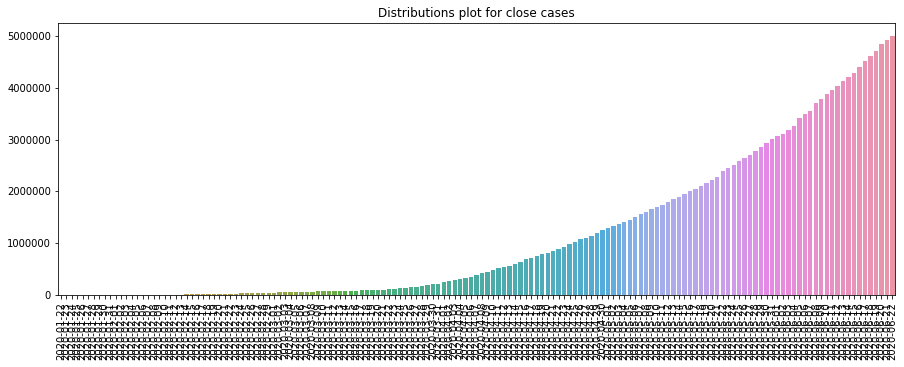

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distributions plot for close cases")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'weakly progress of different cases')

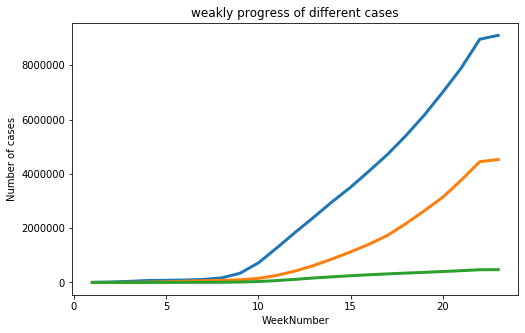

In [16]:
datewise["WeekofYear"]=datewise.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
    
plt.figure(figsize=(8.,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("weakly progress of different cases")



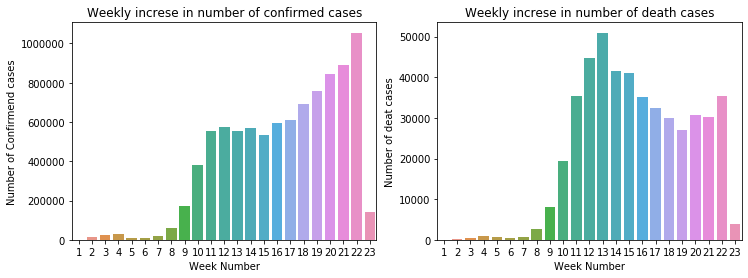

In [17]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmend cases")
ax2.set_ylabel("Number of deat cases")
ax1.set_title("Weekly increse in number of confirmed cases")
ax2.set_title("Weekly increse in number of death cases")
plt.show()


Average increse in number of Confirmed cases everyday 59465.0
Average increse in number of Recovered cases everyday 29584.0
Average increse in number of Death cases everyday 3086.0


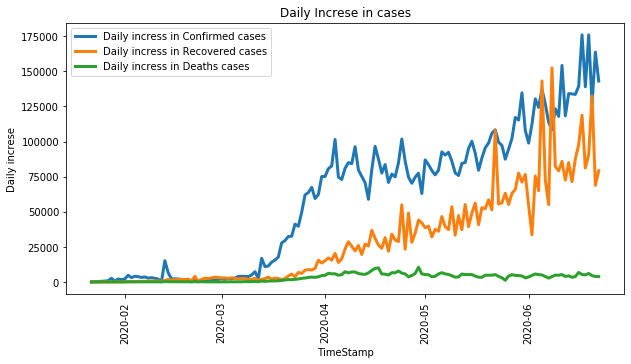

In [18]:
print("Average increse in number of Confirmed cases everyday",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increse in number of Recovered cases everyday",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increse in number of Death cases everyday",np.round(datewise["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(10,5))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily incress in Confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily incress in Recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily incress in Deaths cases",linewidth=3)
plt.xlabel("TimeStamp")
plt.ylabel("Daily increse")
plt.title("Daily Increse in cases")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [19]:
#country wise analsis
#Country wise mortality rate number of death cases/ number of recoverd cases

In [20]:
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovered"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'Top 15 countries as per number of death cases')

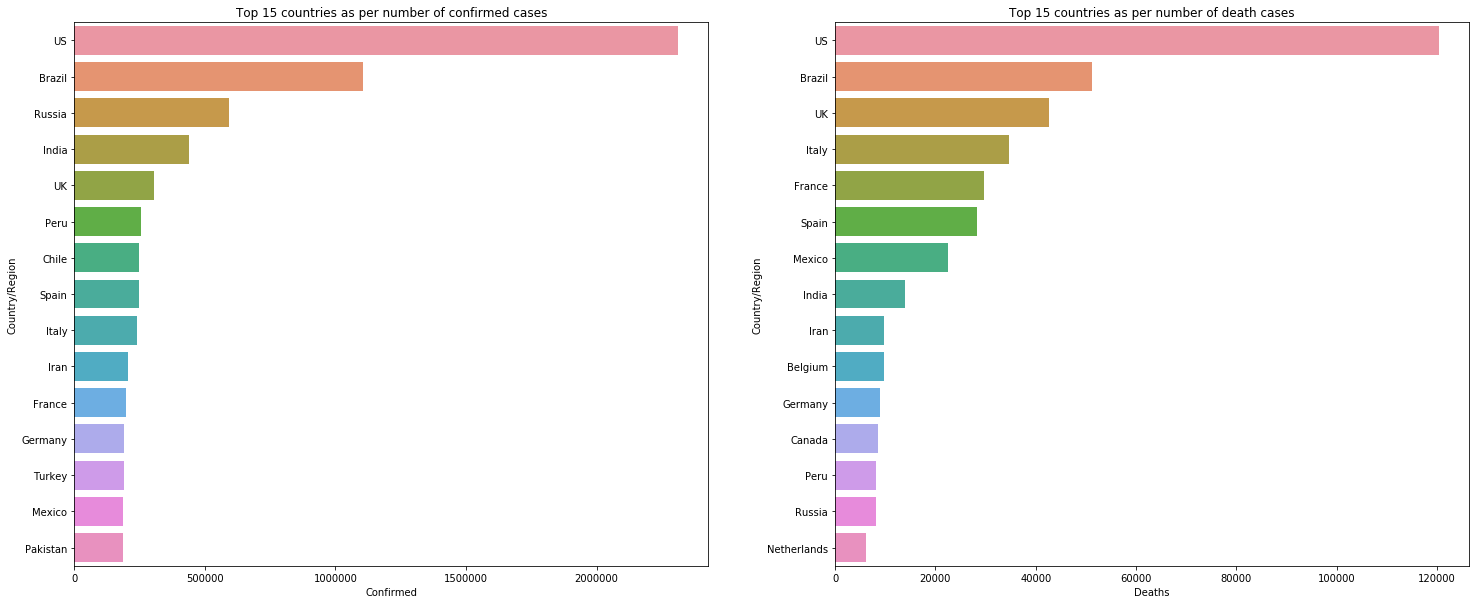

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per number of death cases")

In [22]:
#data analysis of pakistan

In [23]:
pak_data=covid[covid["Country/Region"]=="Pakistan"]
datewise_pak=pak_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_pak.iloc[-1])
print("Total active cases",datewise_pak["Confirmed"].iloc[-1]-datewise_pak["Recovered"].iloc[-1]-datewise_pak["Deaths"].iloc[-1])
print("Total Number of close cases",datewise_pak["Recovered"].iloc[-1]+datewise_pak["Deaths"].iloc[-1])

Confirmed    185034.0
Recovered     73471.0
Deaths         3695.0
Name: 2020-06-22 00:00:00, dtype: float64
Total active cases 107868.0
Total Number of close cases 77166.0


Text(0.5, 1.0, 'weakly progress of different cases')

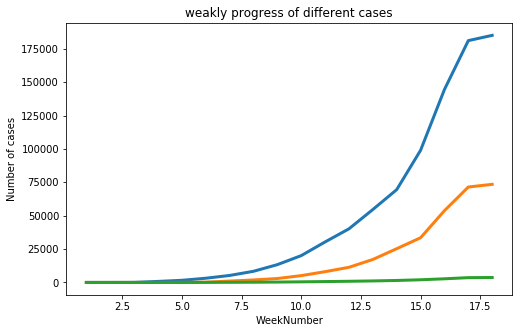

In [24]:
datewise_pak["WeekofYear"]=datewise_pak.index.weekofyear
week_num_pak=[]
pak_weekwise_confirmed=[]
pak_weekwise_recovered=[]
pak_weekwise_deaths=[]
w=1
for i in list(datewise_pak["WeekofYear"].unique()):
    pak_weekwise_confirmed.append(datewise_pak[datewise_pak["WeekofYear"]==i]["Confirmed"].iloc[-1])
    pak_weekwise_recovered.append(datewise_pak[datewise_pak["WeekofYear"]==i]["Recovered"].iloc[-1])
    pak_weekwise_deaths.append(datewise_pak[datewise_pak["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_pak.append(w)
    w=w+1
    
plt.figure(figsize=(8.,5))
plt.plot(week_num_pak,pak_weekwise_confirmed,linewidth=3)
plt.plot(week_num_pak,pak_weekwise_recovered,linewidth=3)
plt.plot(week_num_pak,pak_weekwise_deaths,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("weakly progress of different cases")

In [25]:
#how many days pakistan taken to reach present situtation 

In [26]:
max_pak=datewise_pak["Confirmed"].max()
china_data=covid[covid["Country/Region"]=="Mainland China"]
Italy_data=covid[covid["Country/Region"]=="Italy"]
Us_data=covid[covid["Country/Region"]=="US"]
spain_data=covid[covid["Country/Region"]=="Spain"]
datewise_china=china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Us=Us_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("It took ",datewise_pak[(datewise_pak["Confirmed"]>0)].shape[0],"days in Pakistan to reach",max_pak,"Confirmed cases")
print("It took ",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_pak)].shape[0],"days in Italy to reach Confirmed cases")
print("It took ",datewise_Us[(datewise_Us["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_pak)].shape[0],"days in US to reach Confirmed cases")
print("It took ",datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_pak)].shape[0],"days in China to reach Confirmed cases")
print("It took ",datewise_spain[(datewise_spain["Confirmed"]>0)&(datewise_spain["Confirmed"]<=max_pak)].shape[0],"days in Spain to reach Confirmed cases")

It took  118 days in Pakistan to reach 185034.0 Confirmed cases
It took  82 days in Italy to reach Confirmed cases
It took  82 days in US to reach Confirmed cases
It took  153 days in China to reach Confirmed cases
It took  76 days in Spain to reach Confirmed cases


In [27]:
max_pak=datewise_pak["Confirmed"].max()
Us_data=covid[covid["Country/Region"]=="US"]
brazil_data=covid[covid["Country/Region"]=="Brazil"]
uk_data=covid[covid["Country/Region"]=="UK"]
Italy_data=covid[covid["Country/Region"]=="Italy"]
france_data=covid[covid["Country/Region"]=="France"]
spain_data=covid[covid["Country/Region"]=="Spain"]
maxico_data=covid[covid["Country/Region"]=="Mexico"]
india_data=covid[covid["Country/Region"]=="India"]
iran_data=covid[covid["Country/Region"]=="Iran"]
belgium_data=covid[covid["Country/Region"]=="Belgium"]
canada_data=covid[covid["Country/Region"]=="Canada"]
peru_data=covid[covid["Country/Region"]=="Peru"]
russia_data=covid[covid["Country/Region"]=="Russia"]
netherlands_data=covid[covid["Country/Region"]=="Netherlands"]

In [28]:
datewise_Us=Us_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_brazil=brazil_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_uk=uk_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_france=france_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_maxico=maxico_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_india=india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_iran=iran_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_belgium=belgium_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_canada=canada_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_peru=peru_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_russia=russia_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_netherlands=netherlands_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [29]:
print("It took ",datewise_pak[(datewise_pak["Confirmed"]>0)].shape[0],"days in Pakistan to reach",max_pak,"Confirmed cases")
print("It took ",datewise_Us[(datewise_Us["Confirmed"]>0)&(datewise_Us["Confirmed"]<=max_pak)].shape[0],"days in US to reach Confirmed cases")
print("It took ",datewise_brazil[(datewise_brazil["Confirmed"]>0)&(datewise_brazil["Confirmed"]<=max_pak)].shape[0],"days in Brazil to reach Confirmed cases")
print("It took ",datewise_uk[(datewise_uk["Confirmed"]>0)&(datewise_uk["Confirmed"]<=max_pak)].shape[0],"days in UK to reach Confirmed cases")
print("It took ",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_pak)].shape[0],"days in Italy to reach Confirmed cases")
print("It took ",datewise_france[(datewise_france["Confirmed"]>0)&(datewise_france["Confirmed"]<=max_pak)].shape[0],"days in France to reach Confirmed cases")
print("It took ",datewise_spain[(datewise_spain["Confirmed"]>0)&(datewise_spain["Confirmed"]<=max_pak)].shape[0],"days in Spain to reach Confirmed cases")
print("It took ",datewise_maxico[(datewise_maxico["Confirmed"]>0)&(datewise_maxico["Confirmed"]<=max_pak)].shape[0],"days in Maxico to reach Confirmed cases")
print("It took ",datewise_india[(datewise_india["Confirmed"]>0)&(datewise_india["Confirmed"]<=max_pak)].shape[0],"days in India to reach Confirmed cases")
print("It took ",datewise_iran[(datewise_iran["Confirmed"]>0)&(datewise_iran["Confirmed"]<=max_pak)].shape[0],"days in Iran to reach Confirmed cases")
print("It took ",datewise_belgium[(datewise_belgium["Confirmed"]>0)&(datewise_belgium["Confirmed"]<=max_pak)].shape[0],"days in Belgium to reach Confirmed cases")
print("It took ",datewise_canada[(datewise_canada["Confirmed"]>0)&(datewise_canada["Confirmed"]<=max_pak)].shape[0],"days in Canada to reach Confirmed cases")
print("It took ",datewise_peru[(datewise_peru["Confirmed"]>0)&(datewise_peru["Confirmed"]<=max_pak)].shape[0],"days in Peru to reach Confirmed cases")
print("It took ",datewise_russia[(datewise_russia["Confirmed"]>0)&(datewise_russia["Confirmed"]<=max_pak)].shape[0],"days in Russia to reach Confirmed cases")
print("It took ",datewise_netherlands[(datewise_netherlands["Confirmed"]>0)&(datewise_netherlands["Confirmed"]<=max_pak)].shape[0],"days in Netherlands to reach Confirmed cases")

It took  118 days in Pakistan to reach 185034.0 Confirmed cases
It took  69 days in US to reach Confirmed cases
It took  77 days in Brazil to reach Confirmed cases
It took  93 days in UK to reach Confirmed cases
It took  82 days in Italy to reach Confirmed cases
It took  125 days in France to reach Confirmed cases
It took  76 days in Spain to reach Confirmed cases
It took  115 days in Maxico to reach Confirmed cases
It took  122 days in India to reach Confirmed cases
It took  116 days in Iran to reach Confirmed cases
It took  140 days in Belgium to reach Confirmed cases
It took  149 days in Canada to reach Confirmed cases
It took  91 days in Peru to reach Confirmed cases
It took  98 days in Russia to reach Confirmed cases
It took  117 days in Netherlands to reach Confirmed cases


In [30]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days
trian_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]

In [31]:
lin_reg=LinearRegression(normalize=True)
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(trian_ml["Days Since"]).reshape(-1,1),np.array(trian_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(trian_ml["Days Since"]).reshape(-1,1),np.array(trian_ml["Confirmed"]).reshape(-1,1))

C:\Users\Zubair\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [32]:
prediction_valid_lin_reg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [33]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

pd.set_option("display.float_format",lambda x: '%.f'%x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns=["Dates","LR","SVR"])
model_predictions.head(10)

,Dates,LR,SVR
0,2020-06-23,6579294,8393327
1,2020-06-24,6633463,8640650
2,2020-06-25,6687632,8894481
3,2020-06-26,6741802,9154948
4,2020-06-27,6795971,9422180
5,2020-06-28,6850141,9696307
6,2020-06-29,6904310,9977463
7,2020-06-30,6958480,10265782
8,2020-07-01,7012649,10561400
9,2020-07-02,7066818,10864454


In [34]:
#time series analysis
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]

In [35]:
#arema model
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred=valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))

C:\Users\Zubair\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [36]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
    holt_new_date.append((datewise.index[-1]+timedelta(days=i)))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])
model_predictions["Holts Linear Model Prediction"]=holt_new_prediction 
model_predictions.head()

,Dates,LR,SVR,Holts Linear Model Prediction
0,2020-06-23,6579294,8393327,8751515
1,2020-06-24,6633463,8640650,8863225
2,2020-06-25,6687632,8894481,8974934
3,2020-06-26,6741802,9154948,9086644
4,2020-06-27,6795971,9422180,9198354
